## Do IMDB Ratings Suffer From Recency Bias?

Feature films with user ratings between 1 and 10, made in the US, english language.

Data retrieved from IMDB on June 6th 2019. 

Credit to [dojutsu-user](https://github.com/dojutsu-user/IMDB-Scraper) for his awesome script - worked like a charm.

This analysis covers nearly 60,000 titles.

In [1]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
from plotly import tools

In [9]:
layout = cf.Layout(
    height=500,
    width=900,
    title='Relationship between Release Year and Movie Rating'
)

### All Titles

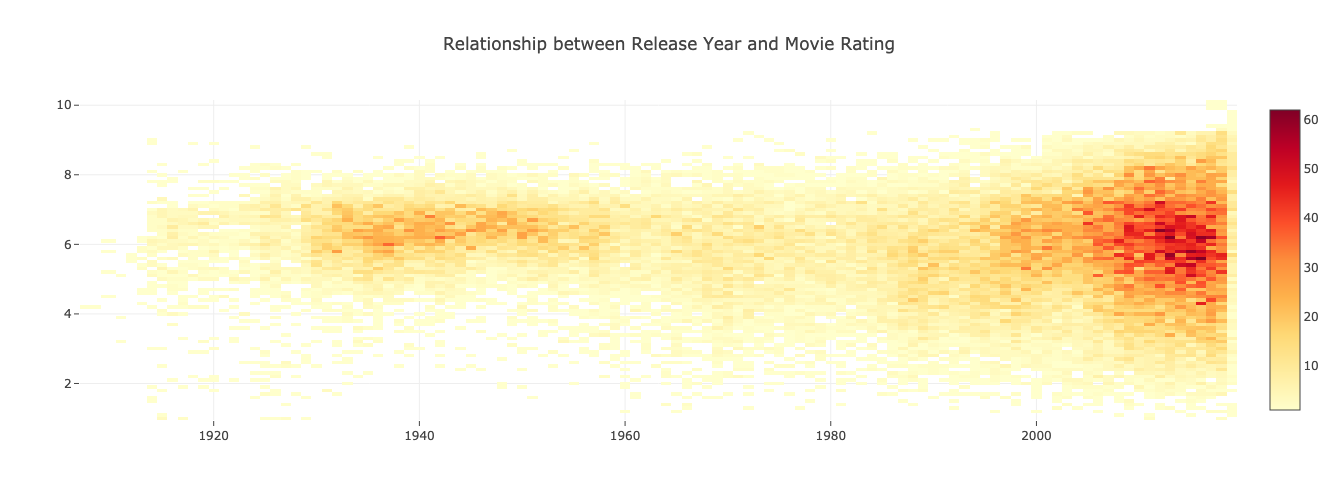

In [11]:
df = pd.read_json('data/movie.json')
df = df[['title','users_rating','year', 'votes']]
df['votes'] = df['votes'].str.replace(',','').astype(float)
df.drop_duplicates(subset ="title", keep = False, inplace = True)
df.groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').pivot(columns='users_rating', values='count').iplot(
    kind='heatmap', theme='white', colorscale='YlOrRd',layout=layout.to_plotly_json())

### Titles With At Least 1,000 Votes

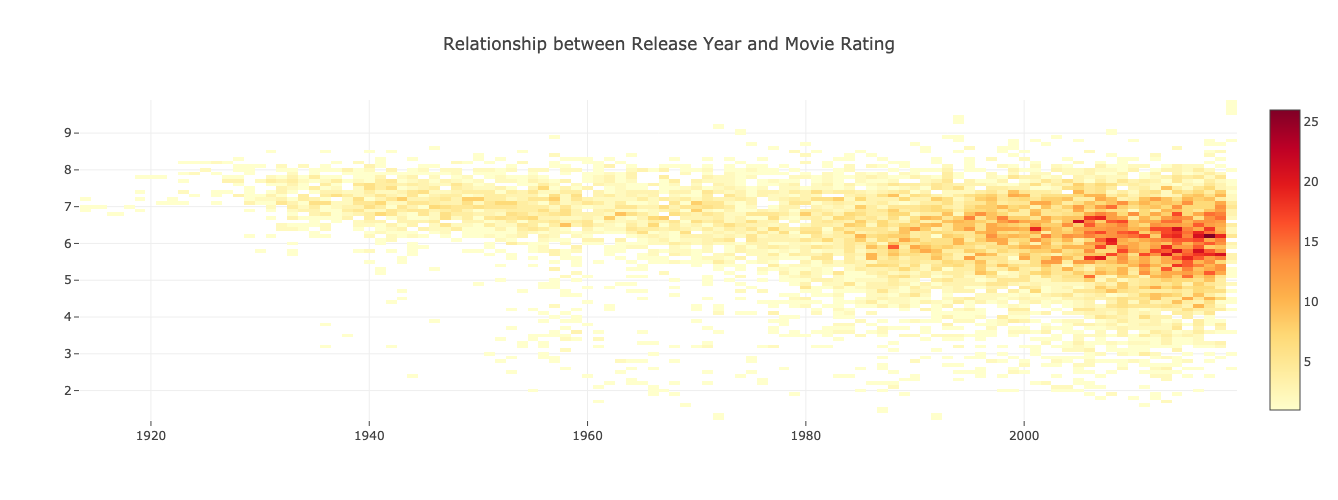

In [4]:
df[df['votes'] > 1000].groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').pivot(columns='users_rating', values='count').iplot(
kind='heatmap', theme='white', colorscale='YlOrRd',layout=layout.to_plotly_json())

### Random 10,000 Title Sample

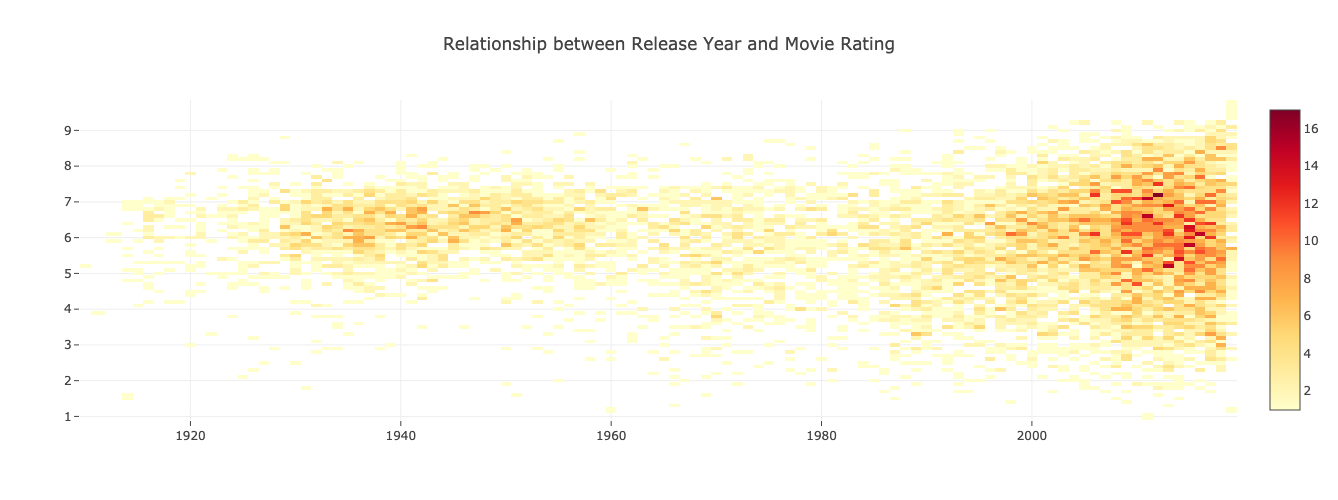

In [5]:
df.sample(10000).groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').pivot(columns='users_rating', values='count').iplot(
kind='heatmap', theme='white', colorscale='YlOrRd',layout=layout.to_plotly_json())

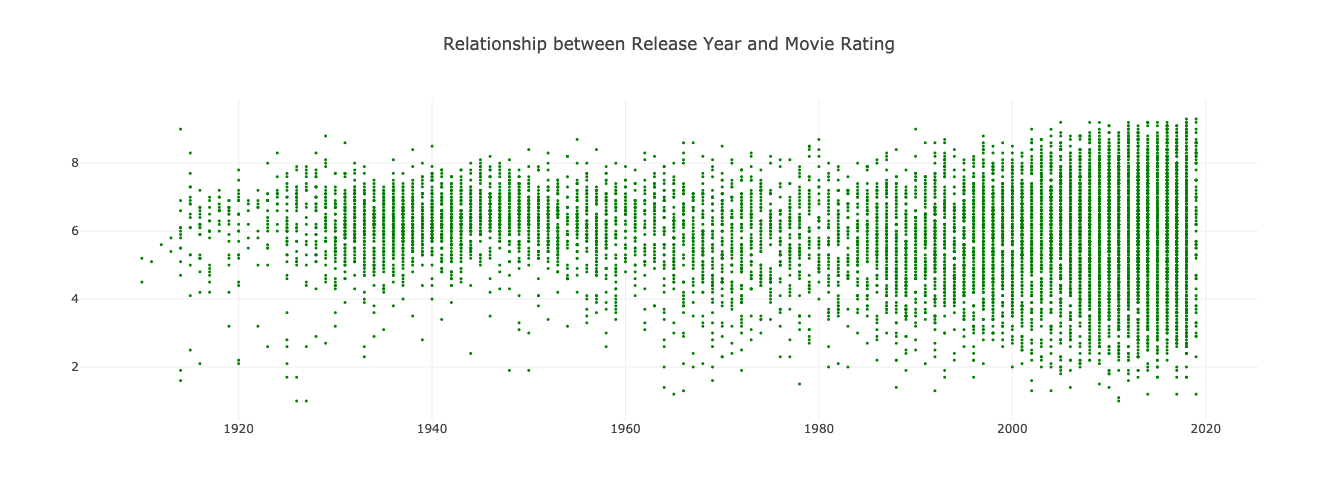

In [6]:
df[['users_rating','year']].sample(10000).iplot(x='year', mode='markers', theme='white', size=3, layout=layout, color='green')

### Impact Of Voters

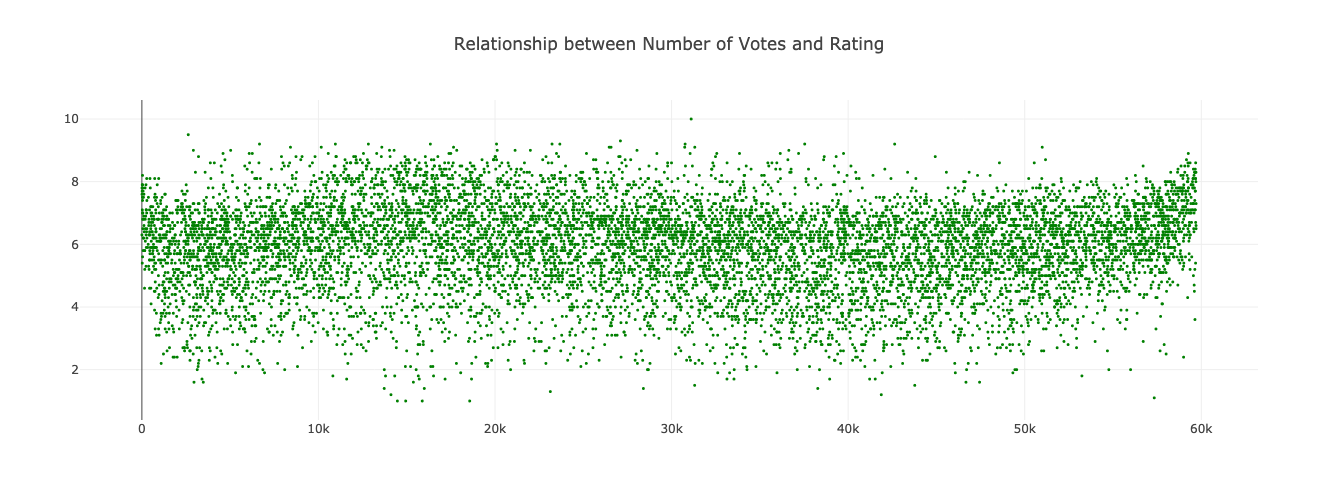

In [116]:
layout = cf.Layout(
    height=500,
    width=900,
    title='Relationship between Number of Votes and Rating'
)

df[['votes','users_rating']].sample(10000).iplot(y='users_rating', mode='markers', theme='white', size=3, layout=layout, color='green')

In [107]:
df[['users_rating','votes']].corr()

users_rating     votes
users_rating      1.000000  0.151365
votes             0.151365  1.000000

### Average Rating Per Year Through Time

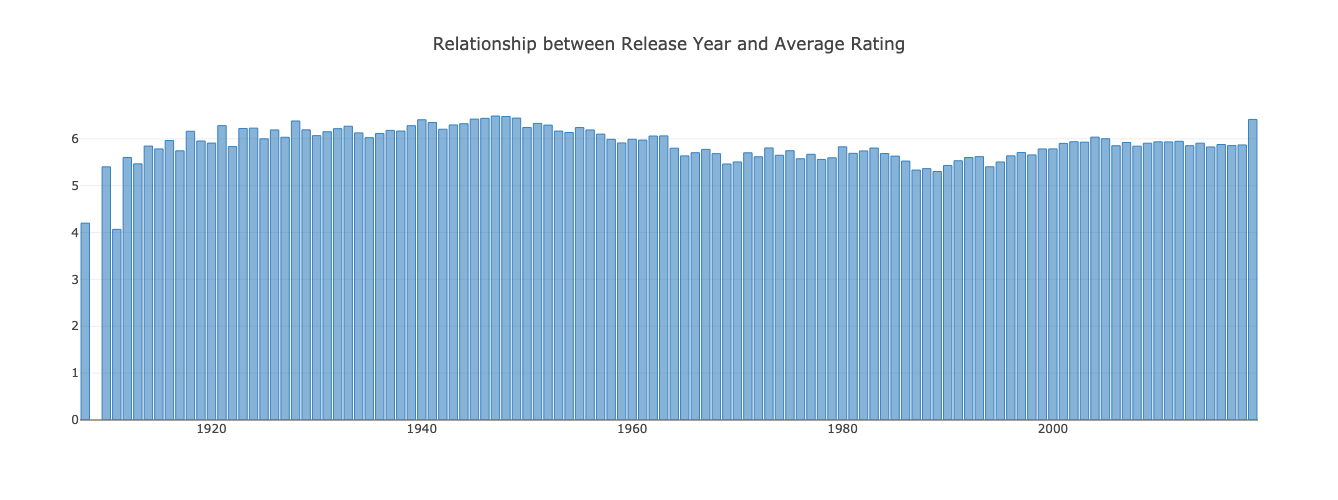

In [113]:
df.groupby("year")["users_rating"].mean().iplot(kind='bar', theme='white', layout=layout, color='blue')